# 1장 OpenCV를 이용한 영상정규화

### 영상 읽기

In [2]:
# pip install opencv-python
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt
from pathlib import Path

from pygments.styles.dracula import background

from python.ch21.opencv_rotate import colored_image

print(cv2.__version__)

4.12.0


In [ ]:
# cv2.imread(filename. flags = None) -> retval
# flags:
# cv2.IMREAD_COLOR: BGR color로 읽기
# cv2.IMREAD_GRAYSCALE: 그레이 color로 읽기
# cv2.IMREAD_UNCHANGED: 파일 속성대로 읽기
# cv2.IMREAD_REDUCED_GRAYSCALE_2 
# cv2.IMREAD_REDUCED_COLOR_2 

# retval: numpy.ndarray로 반환

In [10]:
folder = "fig"

In [ ]:

img = cv2.imread(Path(folder, "dog.bmp"), cv2.IMREAD_COLOR)
# img  = cv2.imread(Path(folder, "mri_brain.jpeg"), cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Image read failed")
    sys.exit()

print(type(img)) # class numpy
print(img.shape) # bgr (rgb x)
print(img.dtype)

# # cv2_imshow(img)
cv2.imshow("dog", img)

cv2.waitKey(0) # ms
cv2.destroyAllWindows()


<class 'numpy.ndarray'>
(630, 630)
uint8


### 새창띄우기 : cv2.namedWindow()

In [ ]:
# cv2.namedWindow(winname, flags = None) -> None

# winname: 창 이름
# flags:
# cv2.WINDOW_NORMAL: 영상크기를 창 크기에 맞게 지정
# cv2.WINDOW_AUTOSIZE: 창크기를 영상 크기에 맞게 변경

# cv2.imwrite(filename, mat) -> None
# filename: 저장할 이름
# mat: numpy.ndarray (default = uint8)

# uint16, int32의 경우 255로 나누어서 출력
# float32, float64의 경우 0 ~ 1로 만든 후 행렬값에 255를 곱해서 출력

In [11]:
## cv2.namedWindow()
img = cv2.imread(Path(folder, "dog.bmp"), cv2.IMREAD_COLOR)

print("width = {}, height = {}".format(
    img.shape[1], img.shape[0]))

# img_resize = cv2.resize(img, (img.shape[1]//2, img.shape[0]//2))

if img is None:
    print("Image read failed")
    sys.exit()

## cv2.WINDOW_AUTOSIZE: 창의 크기를 영상에 맞춤
cv2.namedWindow("Dog", cv2.WINDOW_AUTOSIZE)
# cv2.namedWindow("Dog", cv2.WINDOW_NORMAL)

cv2.imshow("Dog", img)
# cv2.imshow("Dog_resize", img_resize)

cv2.waitKey(0)
cv2.destroyAllWindows()

# mac os
# cv2.waitKey(1)

width = 640, height = 480


### 키보드 입력대기

In [ ]:
# waitKey([, delay]) -> retval
# delay: Delay in milliseconds. 0 is the special value that means "forever"
# cv2.waitKey() -> ASCII code
# retval

In [12]:
img  = cv2.imread(Path(folder, "dog.bmp"), cv2.IMREAD_COLOR)

if img is None:
    print("Image read failed")
    sys.exit()

cv2.namedWindow("dog", cv2.WINDOW_NORMAL)
cv2.imshow("dog", img)

while True:
    if cv2.waitKey() == ord("q"):
        break
    
# cv2.waitKey()
cv2.destroyAllWindows()

## matplotlib

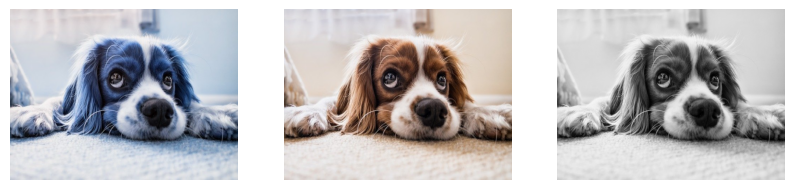

In [13]:
import matplotlib.pyplot as plt

img  = cv2.imread(Path(folder, "dog.bmp"), cv2.IMREAD_COLOR) # BGR
imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #RGB
imggray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # GRAY

if img is None:
    print("Image read failed")
    sys.exit()

# plt.imshow(imgrgb)
# plt.axis("off")
# plt.show()

plt.figure(figsize=(10,3))
plt.subplot(131), plt.imshow(img), plt.axis("off")
plt.subplot(132), plt.imshow(imgrgb), plt.axis("off")
plt.subplot(133), plt.imshow(imggray, cmap = "gray"), plt.axis("off")
plt.show()

# fig, axs = plt.subplots(1, 3, figsize = (10, 4))
# axs[0].imshow(img)
# axs[0].set_title("BGR")
# axs[0].axis('off')
# plt.show()

###  온라인 영상 읽기

In [14]:
from urllib import request

url = "https://image.artbox.co.kr/upload/C00001/goods/800_800/179/241101006087179.jpg?s=/goods/org/179/241101006087179.jpg"
# url = "https://i.ytimg.com/vi/VCUT4Hqy5lA/maxresdefault.jpg"
source = request.urlopen(url).read() # bytes
print(type(source))
print(source)
# bytearray(source)

<class 'bytes'>
b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x03 \x03 \x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x01\x02\x03\x05\x06\x00\x07\x08\xff\xc4\x00L\x10\x00\x02\x01\x03\x02\x04\x04\x03\x06\x04\x04\x04\x03\x06\x04\x07\x01\x02\x03\x00\x04\x11\x05!\x06\x121A\x13"Qa\x142q\x07#B\x81\x91\xa1\x15R\xb1\xc13b\xd1\xe1\x16$Cr4S\xf0%Ds\x82\x92\xf1\x17&T\x83\xa25cd\xb2\xc2\x93\xff\xc4\x00\x1b\x01\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xc4\x00@\x11\x00\x02\x02\x01\x04\x01\x03\x02\x03\x06\x05\x04\x02\x01\x02\x07\x00\x

In [15]:
image = np.array(bytearray(source), dtype = np.uint8)
print("image shape = ", image.shape) # (101968,)

image = cv2.imdecode(image, cv2.IMREAD_COLOR)
cv2.imwrite("Charistmas.png", image)

# cv2.namedWindow("img", cv2.WINDOW_NORMAL)
cv2.imshow("img", image)

cv2.waitKey()
cv2.destroyAllWindows()


image shape =  (161202,)


###  디렉토리 내 영상읽기

In [18]:
import os

img_list = os.listdir(Path(folder, "images"))
# print(img_list)

img_files = [] # list
for i in img_list:
    img_dir = Path(folder, "images", i) # python string
    img_files.append(img_dir)


# print(img_files)

cv2.namedWindow("folder images", cv2.WINDOW_NORMAL)
cv2.setWindowProperty("folder images", cv2.WND_PROP_FULLSCREEN,
                      cv2.WINDOW_FULLSCREEN)

idx = 0
while True:
# for i in img_files:

    img = cv2.imread(img_files[idx], cv2.IMREAD_COLOR)
    cv2.imshow('folder images', img)

    if cv2.waitKey(3000) == 27:
        break

    idx += 1

    if idx >= len(img_files):
        idx = 0

cv2.destroyAllWindows()

### 영상의 픽셀값 참조

In [19]:

img  = cv2.imread(Path(folder, "dog.bmp"), cv2.IMREAD_COLOR)

if img is None:
    print("image read failed")
    sys.exit()

print("img width = {}, height = {}".format(
    img.shape[1], img.shape[0]))

## 영상 픽셀값
x = 320; y = 240
print("x = {}, y = {} 의 픽셀값".format(x, y))
print(img[240, 320])
# print(img[200:300, 250:400])
img[150:250, 250:500] = (125,  44,  66)

cv2.namedWindow("image", cv2.WINDOW_AUTOSIZE)

cv2.imshow("image", img)

while True:
    if cv2.waitKey() == 27:
        break

cv2.destroyAllWindows()

img width = 640, height = 480
x = 320, y = 240 의 픽셀값
[ 0 14 40]


### Canvas

In [11]:
# img1 = np.random.randint(0, 255, (200, 200), np.uint8) # int32
img2 = np.ones((1200, 800, 3), dtype = np.uint8)*255
# img3 = np.zeros((200, 200), np.uint8) + 255
# img4 = np.full((200, 200, 3), (255, 0, 255), np.uint8)

# cv2.imshow("rand int", img1)
cv2.imshow("rand ones", img2)
# cv2.imshow("rand zeros", img3)
# cv2.imshow("rand full", img4)


cv2.waitKey()
cv2.destroyAllWindows()

### 영상 복사 (memory copy)

In [ ]:
img = cv2.imread(Path(folder, "rose.jpg"), cv2.IMREAD_COLOR)


if img is None:
    print("image read failed")
    sys.exit()

# img2 = img
# deep copy
img2 = img.copy()

img2[100:150, 200:300] = (255, 0, 0)

cv2.namedWindow("rose", cv2.WINDOW_AUTOSIZE)
cv2.imshow("rose", img)
cv2.imshow("rose copy", img2)


while True:
    if cv2.waitKey() == ord("q"):
        break

cv2.destroyAllWindows()

### 영상합성

In [ ]:
# 마스크 영상을 이용한 영상 합성 
# cv2.copyTo(src, mask, dst = None) -> dst
# src: copy 하고자 하는 원본 영상
# mask: mask 영상
# dst: copy 후에 결과 영상

In [21]:
## 부분영상: 영상 합성에 유리

img = cv2.imread(Path(folder, "dog.bmp"), cv2.IMREAD_COLOR)

if img is None:
    print("image read failed")
    sys.exit()

dog_eye = img[150:250, 250:500]

# circle(img, center, radius, color[, thickness[, lineType[, shift]]]) -> img
cv2.circle(dog_eye, (50, 50), 30, (0, 0, 255), 5)
print(dog_eye.shape)


cv2.namedWindow("dog", cv2.WINDOW_NORMAL)
cv2.imshow("dog", img)
cv2.imshow("dog eye", dog_eye)


while True:
    if cv2.waitKey() == 27:
        break

cv2.destroyAllWindows()

(100, 250, 3)


In [24]:
## copyTo(): 영상합성

# src = cv2.imread("./fig/airplane.bmp", cv2.IMREAD_COLOR)
# mask = cv2.imread("./fig/mask_plane.bmp", cv2.IMREAD_GRAYSCALE)
# dst = cv2.imread("./fig/field.bmp", cv2.IMREAD_COLOR) #

src = cv2.imread(Path(folder, "airplane.bmp"), cv2.IMREAD_COLOR)
mask = cv2.imread(Path(folder, "mask_plane.bmp"), cv2.IMREAD_GRAYSCALE)
dst = cv2.imread(Path(folder, "field.bmp"), cv2.IMREAD_COLOR) #

print(dst.shape)

if src is None or mask is None or dst is None:
    print("Images read failed")
    sys.exit()

## numpy class
# dst[mask > 0] = src[mask > 0]
cv2.copyTo(src, mask, dst)

cv2.imshow("src", src)
cv2.imshow("mask",mask)
cv2.imshow("dst",dst)

cv2.waitKey()
cv2.destroyAllWindows()


(400, 600, 3)


### 알파 채널 영상 읽기

In [26]:
## 알파채널 영상 읽기

folder = 'fig'
# src = cv2.imread('fig/sunglass.png', cv2.IMREAD_UNCHANGED)
src = cv2.imread(Path(folder, "sunglass.png"), cv2.IMREAD_UNCHANGED)
# IMREAD_UNCHANGED 으로 읽어오면 shape의 채널이 4로 변경됨
dst = cv2.imread(Path(folder, "dog.bmp"))

if src is None or dst is None:
    print('Image read failed!')
    sys.exit()

dst_eye = dst[150:250, 250:500]
h, w = dst_eye[:2]
src = cv2.resize(src, (w // 2 , h // 2))

mask = src[:,:, -1]    # mask는 알파 채널로 만든 마스크 영상
glass = src[:,:, 0:3]  # glass는 b, g, r 3채널로 구성된 컬러 영상

cv2.copyTo(glass, mask, dst_eye)
dst_eye[mask > 0] = (0, 0, 255)

cv2.imshow('src', src)
cv2.imshow('glass', glass)
cv2.imshow('mask', mask)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

(100, 250, 3)
[[ 21  20  29]
 [ 10   9  18]
 [ 27  26  36]
 [ 32  29  44]
 [ 44  41  57]
 [ 37  35  54]
 [ 51  51  69]
 [ 46  50  69]
 [ 44  48  72]
 [ 43  50  77]
 [ 46  54  84]
 [ 51  60  93]
 [ 58  67 101]
 [ 63  72 106]
 [ 46  53  86]
 [ 67  75 105]
 [ 77  85 115]
 [ 88  98 128]
 [102 112 146]
 [ 60  74 110]
 [110 126 163]
 [166 184 221]
 [158 174 211]
 [124 140 177]
 [ 92 109 148]
 [109 125 167]
 [111 128 171]
 [ 98 117 162]
 [116 134 181]
 [102 123 170]
 [105 126 178]
 [ 96 118 170]
 [ 88 109 164]
 [ 80 104 158]
 [ 94 120 174]
 [113 139 193]
 [104 129 185]
 [ 97 121 175]
 [ 91 113 165]
 [ 68  91 141]
 [ 82 104 156]
 [ 85 105 157]
 [ 73  94 145]
 [ 72  92 140]
 [ 83 103 151]
 [ 63  83 131]
 [ 63  81 128]
 [ 61  79 126]
 [ 69  85 131]
 [ 54  70 117]
 [ 46  62 108]
 [ 39  55 101]
 [ 51  67 113]
 [ 50  67 109]
 [ 47  65 105]
 [ 57  73 112]
 [ 53  70 109]
 [ 50  68 105]
 [ 56  71 108]
 [ 60  75 112]
 [ 54  70 106]
 [ 35  51  88]
 [ 44  57  95]
 [ 50  63 101]
 [ 52  67 105]
 [ 51  66 1

error: OpenCV(4.12.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - Can't parse 'dsize'. Sequence item with index 0 has a wrong type
>  - Can't parse 'dsize'. Sequence item with index 0 has a wrong type


In [62]:
folder = 'fig'

src = cv2.imread(Path(folder, "hat_alpha.png"), cv2.IMREAD_UNCHANGED)
dst = cv2.imread(Path(folder, "rudolf.png"), cv2.IMREAD_COLOR)

if src is None or dst is None:
    print('Image read failed!')
    sys.exit()

h, w = src.shape[:2]

src = cv2.resize(src, (w // 8, h // 8))

mask = src[:, : , -1]
hat = src[:, :, :-1]


dst_crop = dst[220: 220 + h // 8, 370: 370 + w // 8]

cv2.copyTo(hat, mask, dst_crop)


cv2.imshow('dst', dst)
cv2.imshow('mask', mask)
cv2.imshow('hat', hat)
# cv2.imshow('dst_crop', dst_crop)

cv2.waitKey()
cv2.destroyAllWindows()

### Draw lines

In [ ]:
# cv2.line(img, pt1, pt2, color, thickness = None, lineType = None, shift = None) -> img
# flags
    # img:그림을 그릴 영상
    # pt1, pt2: 직선의 시작점, 끝점 
    # color: 직선의 칼라 (B,G,R)의 튜플
    # thinkness: 선두께, 기본은= 1
    # lineType: cv2.LINE_4, cv2.LINE_8, cv2.LINE_AA

# cv2.rectangle(img, pt1, pt2, color, thickness = None, lineType = None) -> img
   # pt1 :좌측 상단,  pt2: 우측하단
# cv2.rectangle(img, rect, color, thickness = None, lineType = None) -> img
    # rect: 사각형의 위치 정보 (x, y, w, h)
# cv2.circle(img, center, radius, color, thickness = None, lineType = None) -> img
    # center: 원의 중심좌표 (x, y)
    # radius : 원의 반지름

# cv2.ellips(img, center, axes, angle, startAngle, endAngle, color[, thickness[, lineType[, shift]]]) -> img
    # center: 원의 중심좌표 (x, y)
    # axis: 축의 반지름(x, y)
    # angle: 타원의 기울기 (예, 10, 오른쪽으로 10도 기울어짐)
    # startAngle: 타원을 그리는 시작 각도 (3시 방향이 0도)
    # endAngle: 타원을 그리는 종료 각도

# cv2.polylines(img, pts, isClosed, color, thickness = None, lineType = None) -> img
    # center: 다각형 점들의 array
    # isClosed : True for 폐곡선

In [71]:
## 그리기

img = np.ones((600, 1200, 3), np.uint8)*255
cv2.line(img, (100, 50), (300 ,50), (0, 0, 255), 10, cv2.LINE_AA)
cv2.line(img, (300 ,50), (200, 300), (0, 0, 255), 10, cv2.LINE_AA)
cv2.arrowedLine(img, (400, 50), (400, 300), (255,  0, 0), 10, cv2.LINE_AA)

# cv2.rectangle(img, (200, 400), (400, 500), (0, 0, 255), 5, cv2.LINE_AA) # x1, y1, x2, y2
cv2.rectangle(img, (200, 400, 200, 100), (0, 0, 255), 5, cv2.LINE_AA) # x, y ,w, h

cv2.circle(img, (700, 300), 100, (255, 0, 255), -1)

cv2.ellipse(img, (500, 100), (100, 50), 10, 0, 360, (255, 0, 0), 2)

pts = np.array([[250, 200], [300, 200], [350, 300], [250, 300]])
cv2.polylines(img, [pts], True, (255, 0, 255), 2, cv2.LINE_AA)

text = "OpenCV version=4.9"
cv2.putText(img, text, (700, 100), cv2.FONT_ITALIC, 1,
            (0, 0, 255), 2, cv2.LINE_AA)

cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# 글자 그려보기 (인삼)

background = np.ones((600, 1200, 3), np.uint8)*255

cv2.circle(background, (200, 200), 100, (0, 0, 255), 10, cv2.LINE_AA)
cv2.line(background, (400, 50), (400, 350), (0, 0, 255), 10, cv2.LINE_AA)
cv2.line(background, (200, 400), (200, 500), (0, 0, 255), 10, cv2.LINE_AA)
cv2.line(background, (200, 500), (400, 500), (0, 0, 255), 10, cv2.LINE_AA)

cv2.line(background, (700, 100), (550, 300), (0, 0, 255), 10, cv2.LINE_AA)
cv2.line(background, (700, 100), (850, 300), (0, 0, 255), 10, cv2.LINE_AA)
cv2.line(background, (950, 100), (950, 300), (0, 0, 255), 10, cv2.LINE_AA)
cv2.line(background, (950, 200), (1050, 200), (0, 0, 255), 10, cv2.LINE_AA)

pts = np.array([[750, 400], [950, 400], [950, 500], [750, 500]])
cv2.polylines(background, [pts], True, (0, 0, 255), 10, cv2.LINE_AA)


cv2.imshow('img', background)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 화소점 처리

In [24]:
# add(src1, src2[, dst[, mask[, dtype]]]) -> dst
# src1: 첫번째 입력영상
# src2: 두번째 입력영상
# dst: 덧셈 연산의 결과
# mask: 마스크 영상
# dtype: 출력영상의 타입 (예, cv2.CV_8U, cv2.CV_32F)

## add, subract, addweighted, absdiff, multiply, divivde

In [17]:
folder = 'fig'

# src = cv2.imread("./fig/lenna.png", cv2.IMREAD_COLOR)
src = cv2.imread(Path(folder, "lenna.png"), cv2.IMREAD_COLOR)


if src is None:
    print("image read failed")
    sys.exit()

# dst = src + 50 # 이상 현상 발생


dst1 = cv2.add(src, 100) # 클리핑
#dst1 = np.clip(src + 100., 0, 255).astype(np.uint8) 0 ~ 255 사이로 자동 조정

dst2 = cv2.add(src, (0, 0, 250, 0)) # 클리핑

cv2.imshow("src", src)
cv2.imshow("dst", dst)
# cv2.imshow("dst1", dst1)
# cv2.imshow("dst2", dst2)

cv2.waitKey()
cv2.destroyAllWindows()

In [20]:
## 사칙연산

src1 = cv2.imread(Path(folder, "lenna.png"), cv2.IMREAD_GRAYSCALE)

src2 = np.zeros((220, 220), np.uint8)
cv2.circle(src2, (110, 110), 80, 200, -1)
cv2.circle(src2, (110, 110), 40, 50, -1)

if src is None:
    print("image read failed")
    sys.exit()

# cv2.divide, cv2.multiply()
dst1 = cv2.add(src1, src2)

dst2 = cv2.subtract(src1, src2)
dst3 = cv2.addWeighted(src1, 0.8, src2, 0.2, 0.0)
dst4 = cv2.absdiff(src1, src2)
dst5 = cv2.divide(src1, 2)
dst6 = cv2.multiply(src1, 2)

cv2.imshow("src1", src1)
cv2.imshow("src2", src2)
cv2.imshow("add", dst1)
cv2.imshow("subtract", dst2)
cv2.imshow("addWeighted", dst3)
cv2.imshow("absdiff", dst4)
cv2.imshow("divide", dst5)
cv2.imshow("multiply", dst6)

cv2.waitKey()
cv2.destroyAllWindows()

In [21]:
# src = cv2.imread("./fig/rose.jpg", cv2.IMREAD_COLOR)
src = cv2.imread(Path(folder, "rose.jpg"), cv2.IMREAD_COLOR)

background = np.ones_like(src)*255

weight = np.arange(0, 1, 0.01)
# print(weight)

for i in weight:
    dst = cv2.addWeighted(src, i, background, 1-i, 0.0)
    cv2.imshow('dst', dst)

    if cv2.waitKey(100) == 27:
        break

cv2.destroyAllWindows()

### 영상 히스토 그램

In [ ]:
# cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist
# images: 입력영상 리스트(리스트로 입력)
# channels: 채널리스트, 3 채널의 경우 [0,1,2]
# mask: 마스크 영상입력, 영상전체는 None으로 지정
# histSize: 히스터그램 빈의 크기
# range: 히스토그램의 최솟값과 최댓값
# hist: 계산된 히스토그램, numpy.ndarray 타입
# accumulate: 기존의 히스토그램을 누적할경우 True

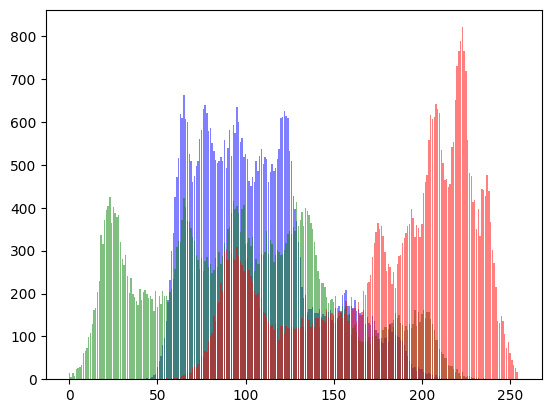

In [22]:
src = cv2.imread(Path(folder, "lenna.png"), cv2.IMREAD_COLOR)

if src is None:
    print("Image read failed")
    sys.exit()

# 채널별 히스토그램
hist_b = cv2.calcHist([src], [0], None, [256], [0, 256]) 
hist_g = cv2.calcHist([src], [1], None, [256], [0, 255])
hist_r = cv2.calcHist([src], [2], None, [256], [0, 255])


plt.bar(np.arange(len(hist_b)), hist_b[:,0], color = "b", alpha = 0.5) # blue channel
plt.bar(np.arange(len(hist_g)), hist_g[:,0], color = "g", alpha = 0.5) # green channel
plt.bar(np.arange(len(hist_r)), hist_r[:,0], color = "r", alpha = 0.5) # red channel
plt.show()

cv2.imshow("lenna", src)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 히스토그램 정규화

In [ ]:
# cv2.normalize(src, dst=None, alpha=None, beta=None, norm_type=None, dtype=None, mask=None) -> dst
# src: 입력영상
# dst: 결과영상
# alpha: 정규화 최소값 (예, 0)
# beta: 정규화 최댓값 (예, 155)
# norm_type: cv2.NORM_MINMAX
# dtype =  -1, src와 같은 type

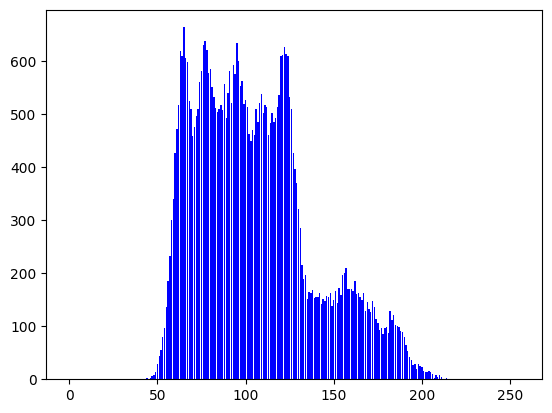

error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-15:Bad number of channels) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<1,-1,-1>,struct cv::impl::A0x6f7fe6c3::Set<3,4,-1>,struct cv::impl::A0x6f7fe6c3::Set<0,2,5>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 3


In [26]:
# src = cv2.imread('fig/puppy_shrink.png')
src = cv2.imread(Path(folder, "puppy_shrink.png"))
# src = cv2.imread('fig/autumn.jpg', cv2.IMREAD_REDUCED_COLOR_8)
# src = cv2.imread('fig/manjang.jpg')

hist = cv2.calcHist([src], [0], None, [256], [0, 256])
plt.bar(np.arange(len(hist)), hist_b[:,0], color = "b")
plt.show()

if src is None:
    print('Image load failed!')
    sys.exit()

# minMaxLoc(src[, mask]) -> minVal, maxVal, minLoc, maxLoc
# smin, smax, _, _ = cv2.minMaxLoc(src)

dst_norm = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX, -1)
# dst = np.clip(255*(src-smin)/(smax-smin) + 0, 0, 255).astype(np.uint8)

cv2.imshow('src', src)
cv2.imshow('dst_norm', dst_norm)

cv2.waitKey()

cv2.destroyAllWindows()